<a href="https://colab.research.google.com/github/Eshikapakhale/Machine-Learning/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary classification with keras

classify loan approval

1-0-Rejected

2-1-Approved


In [1]:
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv


In [2]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Step 2 - Perform Basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [6]:
df.duplicated().sum()

0

### Step 3 - Seperate X and Y

In [7]:
X = df.drop(columns= ["id", "loan_status"])
Y = df[["loan_status"]]

In [8]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [9]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [10]:
Y.value_counts()

,count
loan_status,
0,50295
1,8350


<Axes: xlabel='loan_status'>

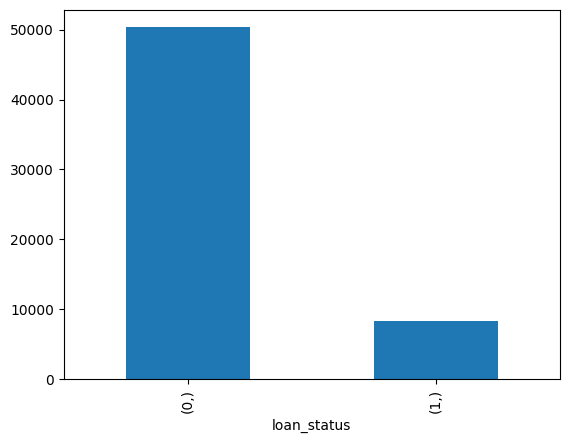

In [11]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply preprocessing on X

In [12]:
X.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,object


In [13]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])


In [14]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [15]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


In [18]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [19]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")


In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5- Train Test split

In [21]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [23]:
xtrain.head()


,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
ytrain.head()


,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [25]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [27]:
xtrain.shape

(46916, 26)

In [28]:
xtest.shape


(11729, 26)

In [29]:
xtrain.shape[1]

26

In [30]:

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [31]:
# Intialize neural network
model = Sequential()

# Add Input layer
model.add(Input( shape=(xtrain.shape[1],) ))

# Add Dense Layer 1
model.add(Dense(units=32, activation="relu"))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))

# Add Dense Layer 2
model.add(Dense(units=16, activation="relu"))
# Add Dropout layer 2
model.add(Dropout(rate=0.2))

# Add output layer with sigmoid activation
model.add(Dense(units=1, activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8762 - loss: 0.3417 - val_accuracy: 0.9211 - val_loss: 0.2275
Epoch 2/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9200 - loss: 0.2334 - val_accuracy: 0.9329 - val_loss: 0.2084
Epoch 3/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9278 - loss: 0.2147 - val_accuracy: 0.9383 - val_loss: 0.2000
Epoch 4/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.2080 - val_accuracy: 0.9399 - val_loss: 0.1937
Epoch 5/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9352 - loss: 0.2029 - val_accuracy: 0.9417 - val_loss: 0.1910
Epoch 6/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9392 - loss: 0.1979 - val_accuracy: 0.9413 - val_loss: 0.1914
Epoch 7/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9380 - loss: 0.2007 - val_accuracy: 0.9410 - val_loss: 0.1893
Epoch 8/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9387 - loss: 0.1993 - 

## **Plot the learning curve**

In [35]:
import matplotlib.pyplot as plt

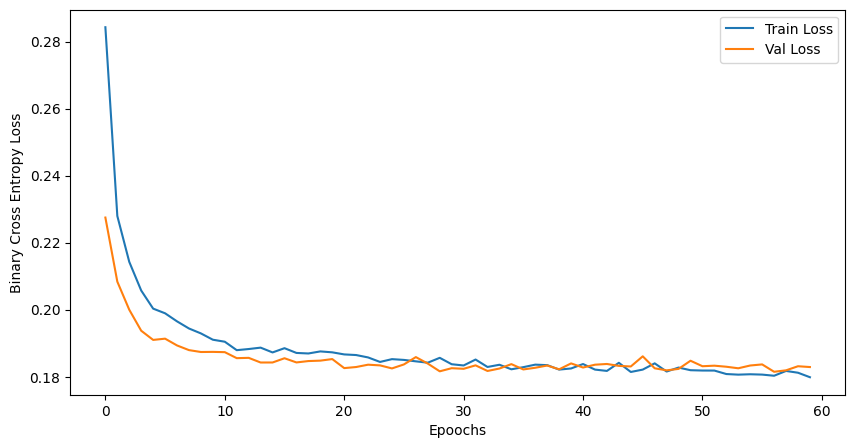

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.xlabel("Epoochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()
plt.show()

## Step 7 - Model evaluation

In [37]:
model.evaluate(xtrain, ytrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9502 - loss: 0.1692


[0.17106632888317108, 0.9498465061187744]

In [38]:
model.evaluate(xtest, ytest)



367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9509 - loss: 0.1692


[0.17319762706756592, 0.9503794312477112]

In [39]:
# Predcict probability for train and test
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [40]:
yprob_train[0:5]

array([[0.25450817],
       [0.05103812],
       [0.01419497],
       [0.01269278],
       [0.028915  ]], dtype=float32)

In [41]:
yprob_test[0:5]

array([[0.04003857],
       [0.02307379],
       [0.07653686],
       [0.10733169],
       [0.05241461]], dtype=float32)

In [42]:
ypred_train = [1 if prob >= 0.5 else 0 for prob in yprob_train]
ypred_train[0:5]


[0, 0, 0, 0, 0]

In [43]:
ytrain.head()



,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [44]:
# Create a function to give final prediction
def predict_results(model, x):
  yprob = model.predict(x)
  ypred = [1 if prob >= 0.5 else 0 for prob in yprob]
  return ypred, yprob

In [45]:
ypred_train, yprob_train = predict_results(model, xtrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [46]:
ypred_train[0:5]

[0, 0, 0, 0, 0]

In [47]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [48]:
ypred_test, yprob_test = predict_results(model, xtest)

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [49]:
ypred_test[0:5]

[0, 0, 0, 0, 0]

In [50]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


## Plot the confusion matrix

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

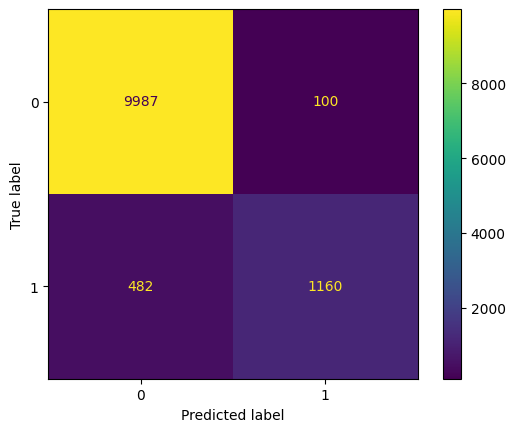

In [52]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.92      0.71      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



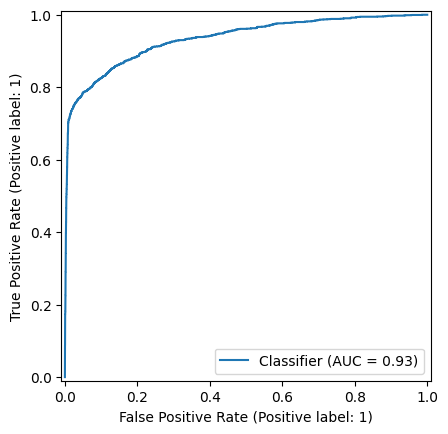

In [54]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

## All above metrics show that this model is good and can be used for out of sample prediction
Out of sample prediction

In [55]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv


In [56]:
xnew = pd.read_csv(url2)
xnew.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [57]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [58]:

xnew_pre = pre.transform(xnew)
xnew_pre.head()


,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [61]:
preds, probs = predict_results(model, xnew_pre)


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [62]:
preds[0:5]

[1, 0, 1, 0, 0]

In [60]:
probs[0:5]

array([[0.99448276],
       [0.05099576],
       [0.50812876],
       [0.04952942],
       [0.19381753]], dtype=float32)

## Save above in csv

In [63]:

res = xnew[["id"]]
res["loan_status"] = preds
res["probs"] = probs

<ipython-input-63-3582001fdeb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["loan_status"] = preds
<ipython-input-63-3582001fdeb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["probs"] = probs


In [64]:
res

,id,loan_status,probs
0,58645,1,0.994483
1,58646,0,0.050996
2,58647,1,0.508129
3,58648,0,0.049529
4,58649,0,0.193818
...,...,...,...
39093,97738,0,0.082487
39094,97739,0,0.007486
39095,97740,0,0.014356
39096,97741,0,0.216566


In [66]:
res["loan_status"].value_counts()


,count
loan_status,
0,34987
1,4111


<Axes: xlabel='loan_status'>

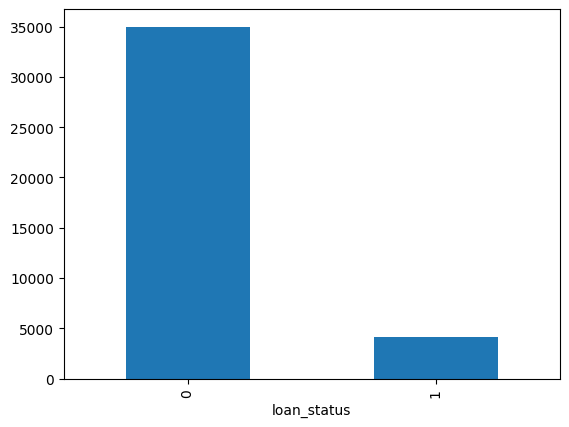

In [67]:
res["loan_status"].value_counts().plot(kind="bar")



In [69]:
res.to_csv("Results.csv", index=False)

## Save the model

In [71]:
model.save("LoanPred.keras")

## Load the model object

In [72]:
from keras.models import load_model

In [73]:
m = load_model("/content/LoanPred.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,229 (16.52 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,820 (11.02 KB)